# The Rise and Fall of The Beatles Through Song
**Benjamin Jenkyn 100622689**

## Can the breakup of the Beatles be seen through their songs?
The goal of this project is to take a look at the songs of the Beatles and see if and how the key events in the band's history can be seen through their songs. (etc. etc.)

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

beatles_songs = pd.read_csv('./beatles_song_database.csv')

## Data Cleanup
This Section is mainly cleaning up the data from the CSV file as the datatypes were not correct or the data was not in the correct format.

In [102]:
# Many of the columns in the dataframe were imported as strings due to how they were written in the CSV file. Here I am converting them to the correct data types.

# Prompt: "beatles_songs["Moods"] contains a series of strings. How can I split the string into an array of strings?"
beatles_songs["Moods"] = beatles_songs["Moods"].str.split()
beatles_songs["Genre"] = beatles_songs["Genre"].str.split(', ')
beatles_songs = beatles_songs[beatles_songs["Year"].notna()]
# Prompt: right now the "Year" series is a list of strings. I want to be able to convert it to a list of ints and remove the strings which cannot be changed into ints
beatles_songs["Year"] = pd.to_numeric(beatles_songs["Year"], errors='coerce').dropna().astype("Int16")
# The values in the "Cover" column were either "Y" or NaN which is messy so I replaced them with boolean values
beatles_songs["Cover"] = beatles_songs["Cover"].replace(np.nan, False).replace("Y", True)

## The Early Years (1956-1962)
![The Beatles With Pete Best](https://www.irishtimes.com/resizer/v2/ZRIFUMPMOWGRLMEXM5VENYWZF4.jpg?auth=f561ac019a9114abd31afe8f8971972953fbdf8ed666ccaadca2b7f1ab553473&smart=true&width=480&height=270)
[source](https://www.irishtimes.com/culture/music/there-s-nothing-to-forgive-pete-best-on-being-sacked-from-the-beatles-1.4199732)

During the early years of the band when they were just getting started
- Mainly did covers
- Still trying to find their sound
- Ringo didn't join until 1962
- 1963 was the year they released their first album and beatlemania began

In [103]:
beatles_songs_year_groupby = beatles_songs.groupby("Year")
cover_songs_per_year = beatles_songs_year_groupby["Cover"].sum()
songs_per_year = beatles_songs_year_groupby["Title"].count()
cover_songs_per_year = cover_songs_per_year.rename("Cover Songs")
songs_per_year = songs_per_year.rename("Songs")
percentage_cover_songs_per_year = np.round(cover_songs_per_year / songs_per_year * 100, 1)
percentage_cover_songs_per_year.name = "Percentage Of Cover Songs Per Year"
cover_songs_data = pd.concat([cover_songs_per_year, songs_per_year, percentage_cover_songs_per_year], axis=1)
cover_songs_data

,Cover Songs,Songs,Percentage Of Cover Songs Per Year
Year,,,
1958,1,2,50.0
1960,0,3,0.0
1961,1,3,33.3
1962,3,9,33.3
1963,41,61,67.2
1964,13,38,34.2
1965,3,36,8.3
1966,0,19,0.0
1967,0,25,0.0


/var/folders/c2/pz90dsn53hzb8fnld7dh2pcw0000gn/T/ipykernel_66056/376466232.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cover_songs_barplot.set_yticklabels([f"{int(y)}%" for y in cover_songs_barplot.get_yticks()])


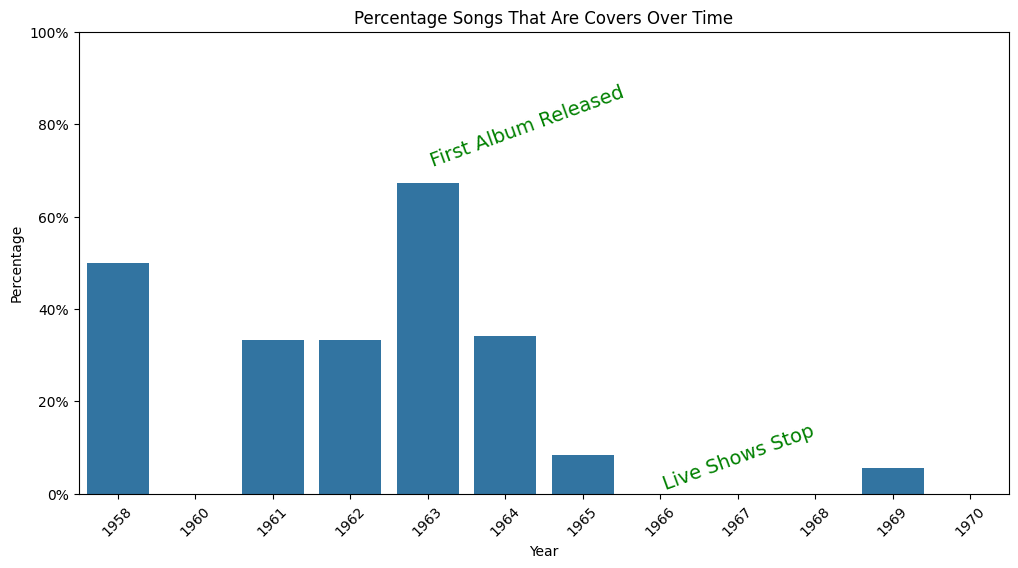

In [104]:
cover_songs_barplot = sns.barplot(x=cover_songs_data.index, y=cover_songs_data["Percentage Of Cover Songs Per Year"])
cover_songs_barplot.set(ylim=(0, 100))
cover_songs_barplot.set_ylabel("Percentage")
plt.xticks(ticks=range(len(cover_songs_data.index)), labels=cover_songs_data.index, rotation=45)
# Prompt: Set the y ticks to percentages
cover_songs_barplot.set_yticklabels([f"{int(y)}%" for y in cover_songs_barplot.get_yticks()])
plt.text(4, 70, "First Album Released", ha='left', va='bottom', fontsize=14, color='green', rotation=20)
plt.text(7, 0, "Live Shows Stop", ha='left', va='bottom', fontsize=14, color='green', rotation=20)
plt.title("Percentage Songs That Are Covers Over Time")
plt.gcf().set_size_inches(12, 6)
plt.show()

### The Early Years End
The early years saw the beatles doing a lot of live shows and cover songs while trying to break through and find their sound. The end of the early years can be seen through the release of their first album "Please Please Me" in 1963. This album was the start of the beatlemania that would follow the band for the rest of their career. After the first album was released you can see the band start to write more of their own songs and start to find their own sound.

## Beatlemania (1963-1966)
<a title="United Press International, photographer unknown, Public domain, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:The_Beatles_arrive_at_JFK_Airport.jpg"><img width="512" alt="The Beatles wave to fans after disembarking a plane at Kennedy Airport." src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/61/The_Beatles_arrive_at_JFK_Airport.jpg/512px-The_Beatles_arrive_at_JFK_Airport.jpg?20240427190833"></a>
<a href="https://commons.wikimedia.org/wiki/File:The_Beatles_arrive_at_JFK_Airport.jpg">United Press International, photographer unknown</a>, Public domain, via Wikimedia Commons

- Beatlemania was in full swing
- The Beatles were releasing albums and singles at a rapid pace
- The Beatles were touring the world
- In 1966 the Beatles stopped touring due to the stress and the fact that they couldn't hear themselves play over the screaming fans

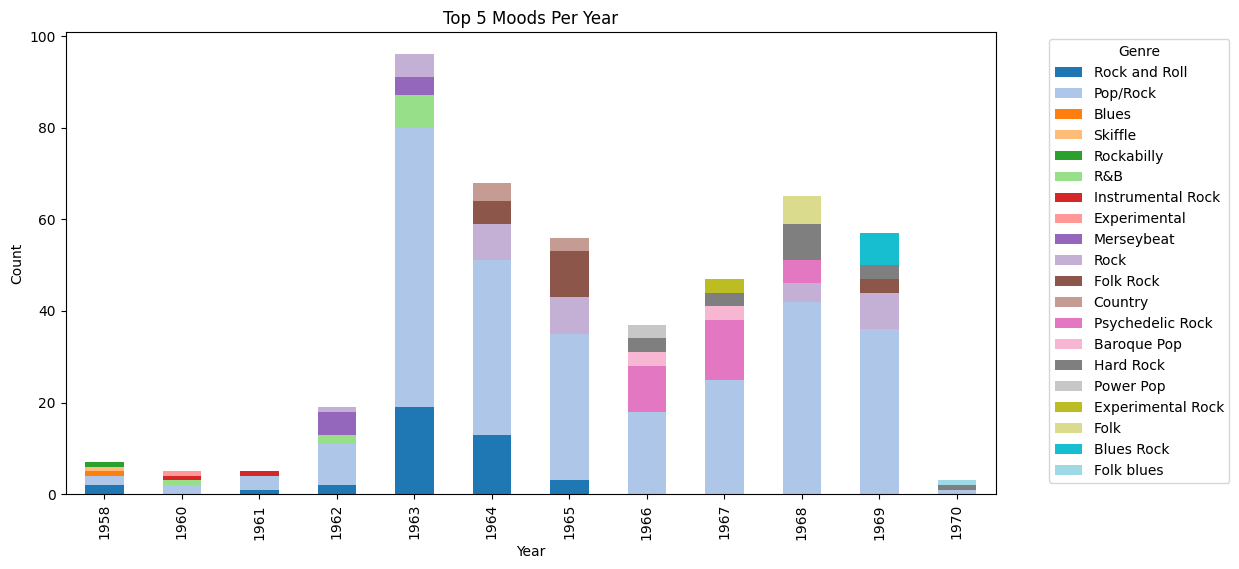

In [109]:
moods_by_year = beatles_songs.explode("Genre").groupby("Year")["Genre"]
top_moods_per_year = moods_by_year.value_counts().groupby(level=0).head(5)
moods_by_year
top_moods_per_year.unstack().plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title("Top 5 Moods Per Year")
plt.ylabel("Count")
plt.xlabel("Year")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### The End of Beatlemania
The Beatles began their career mainly by performing Pop/Rock songs like those that were popular at the time, but as they grew as a band they started to experiment with different sounds and styles. As Beatlemania began to end the band started to experiment with different sounds and styles. As band started experimenting with psychedelic drugs their music started to change as well. This can be seen in the album "Revolver" which was released in 1966. This album was a turning point for the band as they started to experiment with different sounds and styles.

## The Studio Years (1967-1970)
![The image shows Sgt. Pepper's inner gatefold photograph.](https://upload.wikimedia.org/wikipedia/en/4/44/Sgtpeppergatefold.jpg)
[source](https://en.wikipedia.org/wiki/File:Sgtpeppergatefold.jpg)

- The Beatles stopped touring and focused on the studio
- They released some of their most famous albums during this time
- The band was starting to fall apart
- The band released their final album in 1970
- The band broke up in 1970

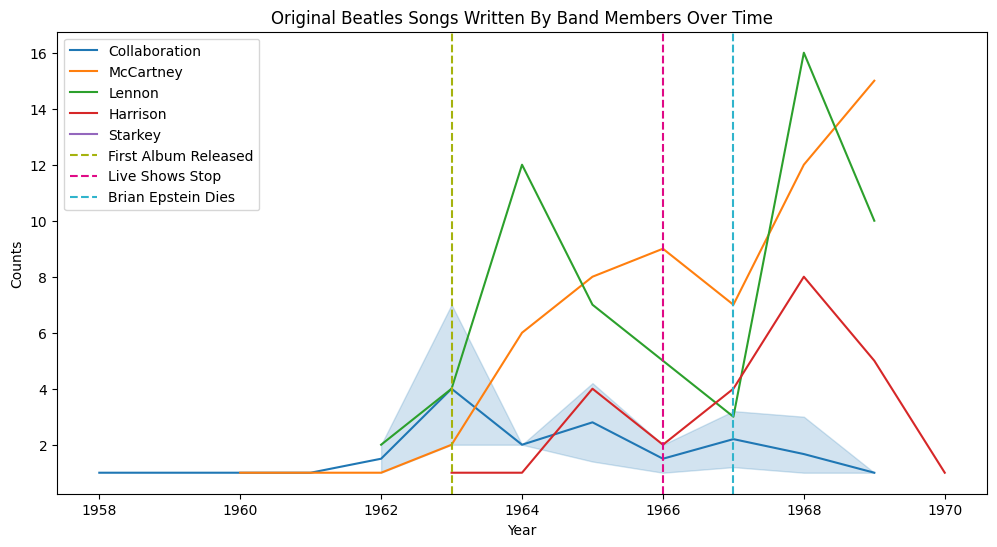

In [107]:
original_beatles_songs = beatles_songs[beatles_songs["Cover"] == False]
songwriters_by_year = (
    original_beatles_songs.groupby(["Year", "Songwriter(s)"])
    .size()
    .reset_index(name="Counts")
)
# Prompt: "Filter the songwriters to include only those containing Lennon, McCartney, Harrison, or Starkey"
# Filter the songwriters to include only those containing Lennon, McCartney, Harrison, or Starkey
songwriters_by_year = songwriters_by_year[
    songwriters_by_year["Songwriter(s)"].str.contains(
        "Lennon|McCartney|Harrison|Starkey"
    )
]
# Prompt: in the Songwriter(s) column only any string where the songwriter isn't just "Lennon" "McCartney" "Harrision" or "Starkey" (for example if the string is Lennon and McCartney) change it to say "Collaboration"
songwriters_by_year["Songwriter(s)"] = songwriters_by_year["Songwriter(s)"].apply(
    lambda x: (
        x if x in ["Lennon", "McCartney", "Harrison", "Starkey"] else "Collaboration"
    )
)
sns.lineplot(data=songwriters_by_year, x="Year", y="Counts", hue="Songwriter(s)")

# Prompt: "Add a vertical line at 1963 to indicate the year of the first album release"
plt.axvline(x=1963, color='#a5b30e', linestyle='--', label='First Album Released')

plt.axvline(x=1966, color='#E00A86', linestyle='--', label='Live Shows Stop')
plt.axvline(x=1967, color='#30B4CC', linestyle='--', label='Brian Epstein Dies')
plt.title("Original Beatles Songs Written By Band Members Over Time")
plt.legend()
plt.gcf().set_size_inches(12, 6)
plt.show()

### The Breakup
The graph above shows the decline of beatles colaboration overtime and the rise of individually written songs. This can be seen as the band started to fall apart and the members started to write their own songs. The band was no longer working together as a group and this can be seen in the data. One of the other key points of the breakup was George Harision growing as a songwriter yet feeling like he was not being taken seriously. We can see from the data that the number of songs written by George Harrison increased over time until the band broke up.

## References

### CSV File Source
- https://www.kaggle.com/datasets/devedzic/the-beatles-songs-

### Beatles Data Sources
- https://faroutmagazine.co.uk/timeline-of-the-beatles-split/
- https://www.historic-newspapers.co.uk/blog/beatles-timeline/
- https://thehistoryofrockandroll.net/the-beatles/